# Final_Regressor_31072023

#### Content:
#### 1. Preprocessing
#### 2. Multilanear Regression Model 
#### 3. Decision Tree Regression
#### 4. Random Forest Regression 
#### 5. Support Vector Machines
#### 6. Catboost
#### 7. XGB Model


# Preprocessing 

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [254]:
data = pd.read_csv(r'C:\Users\user\Downloads\Life Expectancy Data.csv')

In [255]:
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [256]:
data.describe(include='all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [257]:
# Country has 193 unique values. Drop 

In [258]:
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [259]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object

In [260]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [261]:
for i in data[['Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure','Diphtheria ','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling','Life expectancy ']]:
    if data[i].dtype == 'object':
        mode = data[i].mode()[0]
        data[i].fillna(mode, inplace=True)
    else:
        mean = data[i].mean()
        data[i].fillna(mean, inplace=True)

In [262]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [263]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [264]:
column_titles = data[['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
                'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
                'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
                ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
                'Life expectancy ']]

In [265]:
cleaned_titles = [title.replace(' ', '').capitalize() for title in column_titles]

In [266]:
print(cleaned_titles)

['Country', 'Year', 'Status', 'Adultmortality', 'Infantdeaths', 'Alcohol', 'Percentageexpenditure', 'Hepatitisb', 'Measles', 'Bmi', 'Under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness1-19years', 'Thinness5-9years', 'Incomecompositionofresources', 'Schooling', 'Lifeexpectancy']


In [267]:
column_mapping = {
    'Country': 'Country',
    'Year': 'Year',
    'Status': 'Status',
    'Adult Mortality': 'Adultmortality',
    'infant deaths': 'Infantdeaths',
    'Alcohol': 'Alcohol',
    'percentage expenditure': 'Percentageexpenditure',
    'Hepatitis B': 'Hepatitisb',
    'Measles ': 'Measles',
    ' BMI ': 'Bmi',
    'under-five deaths ': 'Under-fivedeaths',
    'Polio': 'Polio',
    'Total expenditure': 'Totalexpenditure',
    'Diphtheria ': 'Diphtheria',
    ' HIV/AIDS': 'Hiv/aids',
    'GDP': 'Gdp',
    'Population': 'Population',
    ' thinness  1-19 years': 'Thinness1-19years',
    ' thinness 5-9 years': 'Thinness5-9years',
    'Income composition of resources': 'Incomecompositionofresources',
    'Schooling': 'Schooling',
    'Life expectancy ': 'Lifeexpectancy'
}


data = data.rename(columns=column_mapping)

print("\nUpdated DataFrame:")
print(data)



Updated DataFrame:
          Country  Year      Status  Adultmortality  Infantdeaths  Alcohol  \
0     Afghanistan  2015  Developing           263.0            62     0.01   
1     Afghanistan  2014  Developing           271.0            64     0.01   
2     Afghanistan  2013  Developing           268.0            66     0.01   
3     Afghanistan  2012  Developing           272.0            69     0.01   
4     Afghanistan  2011  Developing           275.0            71     0.01   
...           ...   ...         ...             ...           ...      ...   
2933     Zimbabwe  2004  Developing           723.0            27     4.36   
2934     Zimbabwe  2003  Developing           715.0            26     4.06   
2935     Zimbabwe  2002  Developing            73.0            25     4.43   
2936     Zimbabwe  2001  Developing           686.0            25     1.72   
2937     Zimbabwe  2000  Developing           665.0            24     1.68   

      Percentageexpenditure  Hepatitisb  Me

In [268]:
data

,Country,Year,Status,Adultmortality,Infantdeaths,Alcohol,Percentageexpenditure,Hepatitisb,Measles,Bmi,...,Totalexpenditure,Diphtheria,Hiv/aids,Gdp,Population,Thinness1-19years,Thinness5-9years,Incomecompositionofresources,Schooling,Lifeexpectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [269]:
data.drop('Country', axis=1, inplace=True)

In [270]:
data.corr()['Lifeexpectancy']

C:\Users\user\AppData\Local\Temp\ipykernel_23676\1992969647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Lifeexpectancy']


Year                            0.169623
Adultmortality                 -0.696359
Infantdeaths                   -0.196535
Alcohol                         0.391598
Percentageexpenditure           0.381791
Hepatitisb                      0.203771
Measles                        -0.157574
Bmi                             0.559255
Under-fivedeaths               -0.222503
Polio                           0.461574
Totalexpenditure                0.207981
Diphtheria                      0.475418
Hiv/aids                       -0.556457
Gdp                             0.430493
Population                     -0.019638
Thinness1-19years              -0.472162
Thinness5-9years               -0.466629
Incomecompositionofresources    0.692483
Schooling                       0.715066
Lifeexpectancy                  1.000000
Name: Lifeexpectancy, dtype: float64

In [271]:
data.dtypes

Year                              int64
Status                           object
Adultmortality                  float64
Infantdeaths                      int64
Alcohol                         float64
Percentageexpenditure           float64
Hepatitisb                      float64
Measles                           int64
Bmi                             float64
Under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
Hiv/aids                        float64
Gdp                             float64
Population                      float64
Thinness1-19years               float64
Thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
Lifeexpectancy                  float64
dtype: object

In [272]:
data.drop('Population', axis=1, inplace=True)

In [273]:
data.head

<bound method NDFrame.head of       Year      Status  Adultmortality  Infantdeaths  Alcohol  \
0     2015  Developing           263.0            62     0.01   
1     2014  Developing           271.0            64     0.01   
2     2013  Developing           268.0            66     0.01   
3     2012  Developing           272.0            69     0.01   
4     2011  Developing           275.0            71     0.01   
...    ...         ...             ...           ...      ...   
2933  2004  Developing           723.0            27     4.36   
2934  2003  Developing           715.0            26     4.06   
2935  2002  Developing            73.0            25     4.43   
2936  2001  Developing           686.0            25     1.72   
2937  2000  Developing           665.0            24     1.68   

      Percentageexpenditure  Hepatitisb  Measles   Bmi  Under-fivedeaths  \
0                 71.279624        65.0     1154  19.1                83   
1                 73.523582        62

In [274]:
data.columns

Index(['Year', 'Status', 'Adultmortality', 'Infantdeaths', 'Alcohol',
       'Percentageexpenditure', 'Hepatitisb', 'Measles', 'Bmi',
       'Under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'Hiv/aids', 'Gdp', 'Thinness1-19years', 'Thinness5-9years',
       'Incomecompositionofresources', 'Schooling', 'Lifeexpectancy'],
      dtype='object')

In [275]:
data.dtypes

Year                              int64
Status                           object
Adultmortality                  float64
Infantdeaths                      int64
Alcohol                         float64
Percentageexpenditure           float64
Hepatitisb                      float64
Measles                           int64
Bmi                             float64
Under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
Hiv/aids                        float64
Gdp                             float64
Thinness1-19years               float64
Thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
Lifeexpectancy                  float64
dtype: object

In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[[#'Year',
                  'Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure', 
                  #'Hepatitisb', 
                  'Measles',
                  'Bmi',
                  #'Under-fivedeaths', 
                  #'Polio', 
                  'Totalexpenditure', 
                  #'Diphtheria',
                  'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years',
                  #'Thinness5-9years',
                  #'Incomecompositionofresources',
                  #'Schooling'
]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.572980,Adultmortality
1,1.734244,Infantdeaths
2,3.143452,Alcohol
3,5.547664,Percentageexpenditure
4,1.394803,Measles
5,4.824246,Bmi
6,6.229985,Totalexpenditure
7,1.546564,Hiv/aids
8,6.460500,Gdp
9,2.896922,Thinness1-19years


In [277]:
data = data[['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
            'Measles',
                  'Bmi',
            'Totalexpenditure',
            'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years','Lifeexpectancy']]

In [278]:
data

,Adultmortality,Infantdeaths,Alcohol,Percentageexpenditure,Measles,Bmi,Totalexpenditure,Hiv/aids,Gdp,Thinness1-19years,Lifeexpectancy
0,263.0,62,0.01,71.279624,1154,19.1,8.16,0.1,584.259210,17.2,65.0
1,271.0,64,0.01,73.523582,492,18.6,8.18,0.1,612.696514,17.5,59.9
2,268.0,66,0.01,73.219243,430,18.1,8.13,0.1,631.744976,17.7,59.9
3,272.0,69,0.01,78.184215,2787,17.6,8.52,0.1,669.959000,17.9,59.5
4,275.0,71,0.01,7.097109,3013,17.2,7.87,0.1,63.537231,18.2,59.2
...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,31,27.1,7.13,33.6,454.366654,9.4,44.3
2934,715.0,26,4.06,0.000000,998,26.7,6.52,36.7,453.351155,9.8,44.5
2935,73.0,25,4.43,0.000000,304,26.3,6.53,39.8,57.348340,1.2,44.8
2936,686.0,25,1.72,0.000000,529,25.9,6.16,42.1,548.587312,1.6,45.3


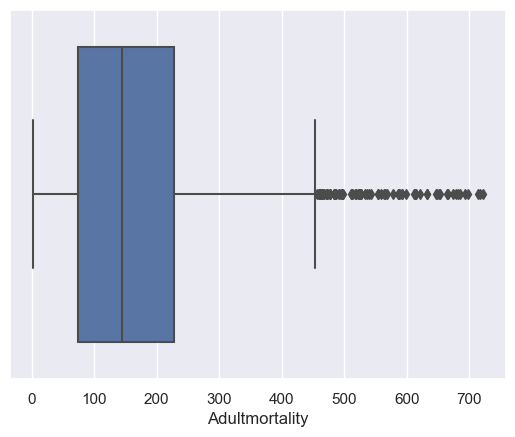

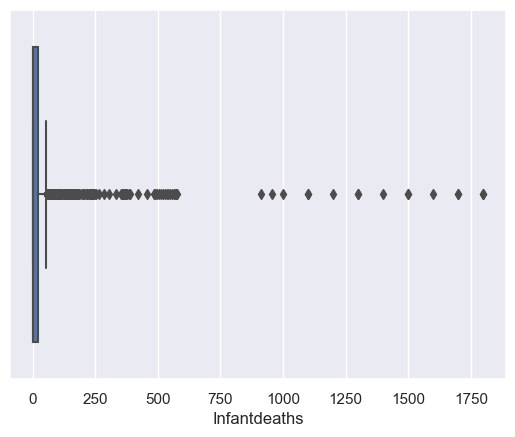

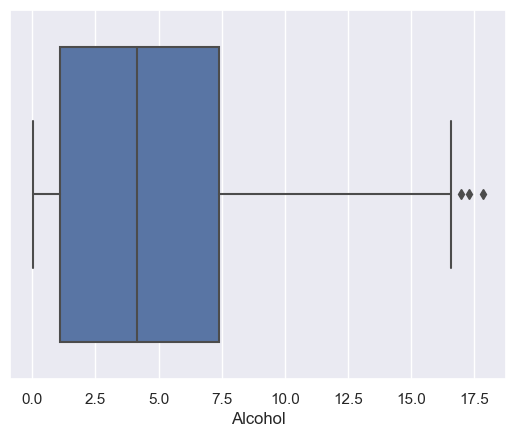

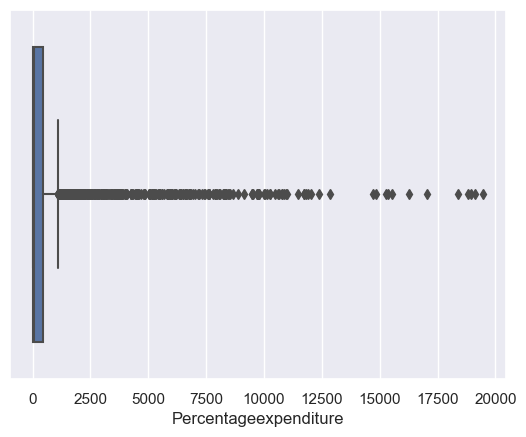

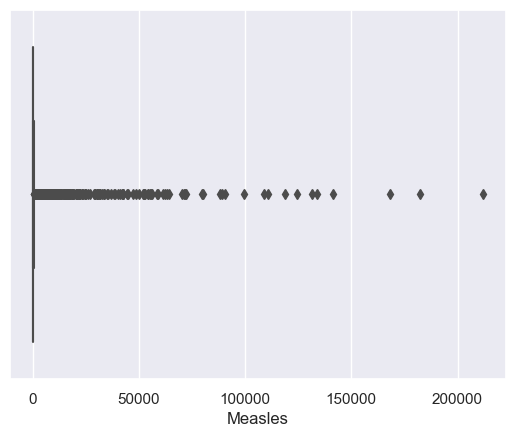

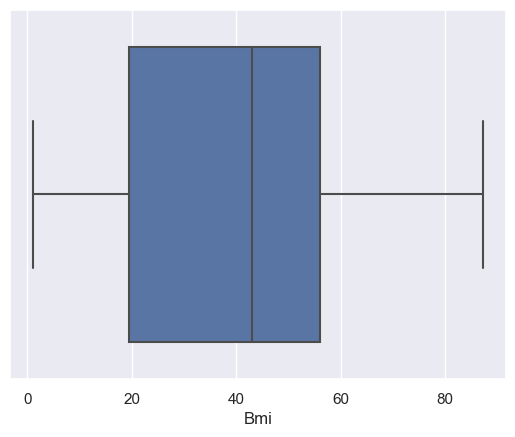

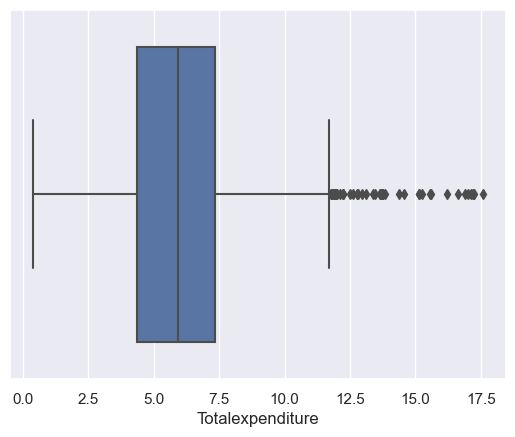

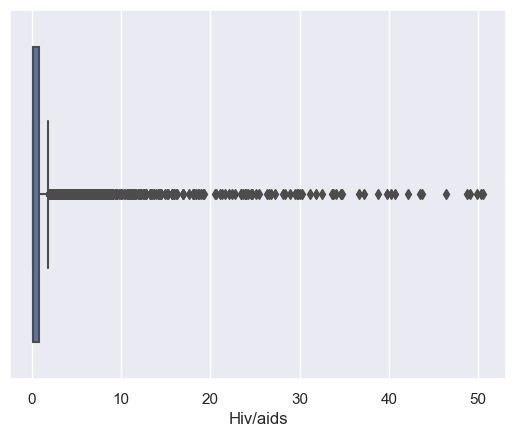

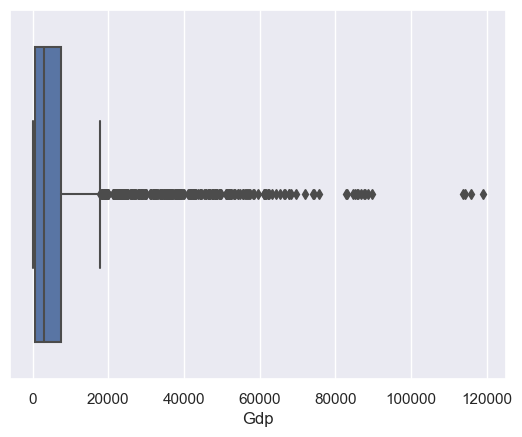

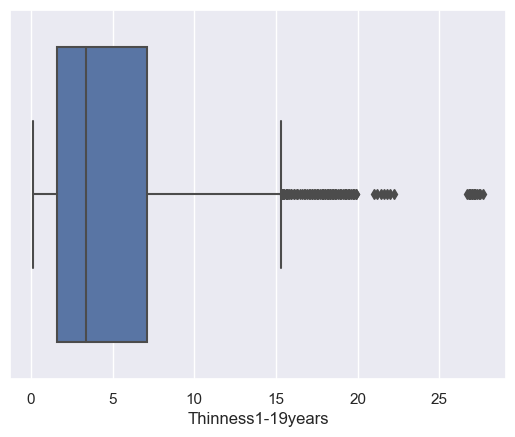

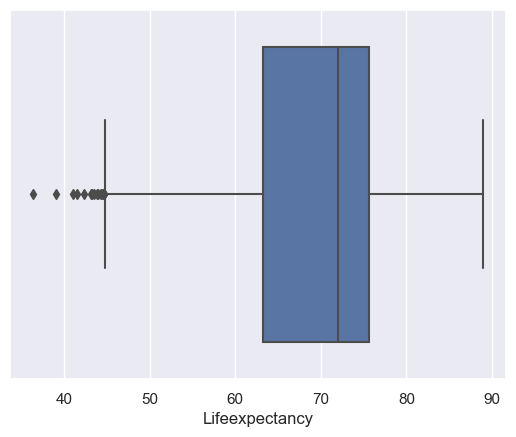

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

for i in data[['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years','Lifeexpectancy']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [280]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [281]:
for i in data [['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years','Lifeexpectancy']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i], data[i])
    data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])

C:\Users\user\AppData\Local\Temp\ipykernel_23676\2509646702.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i], data[i])
C:\Users\user\AppData\Local\Temp\ipykernel_23676\2509646702.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])


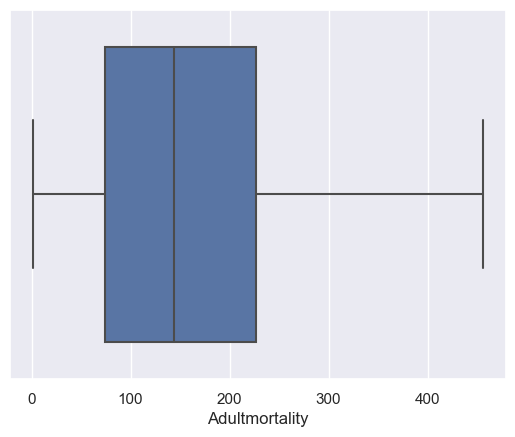

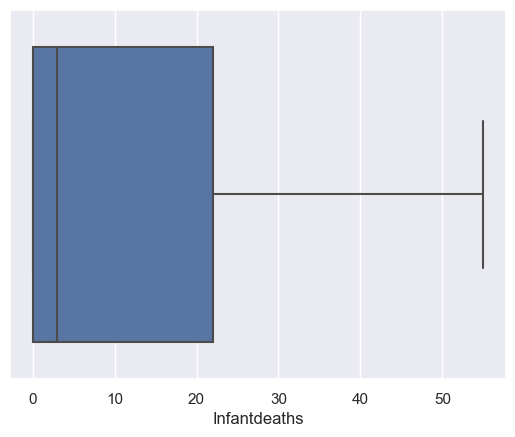

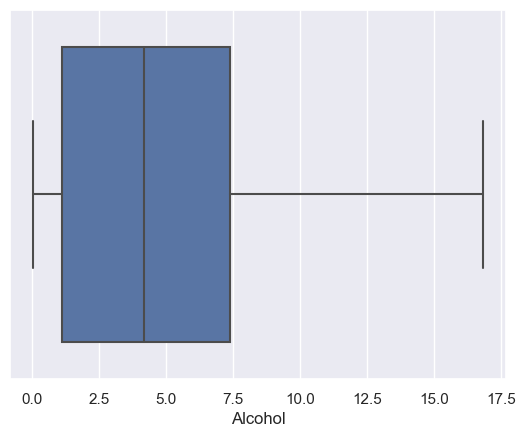

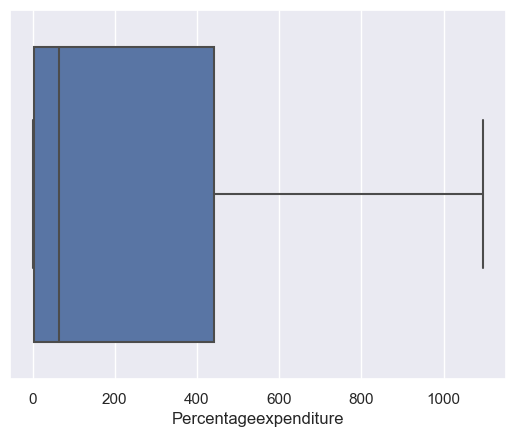

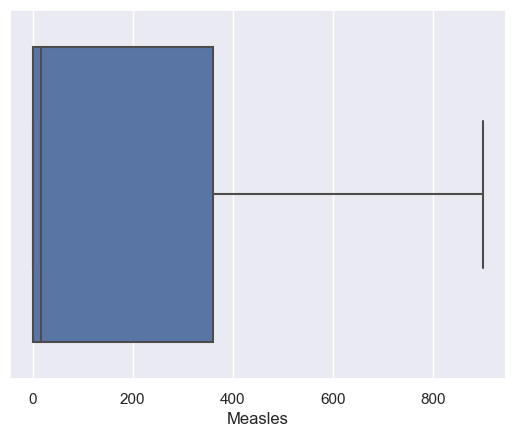

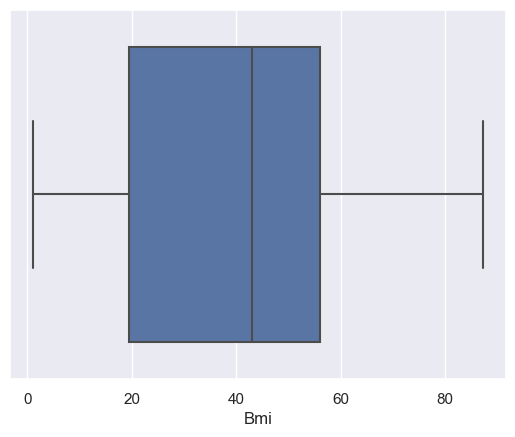

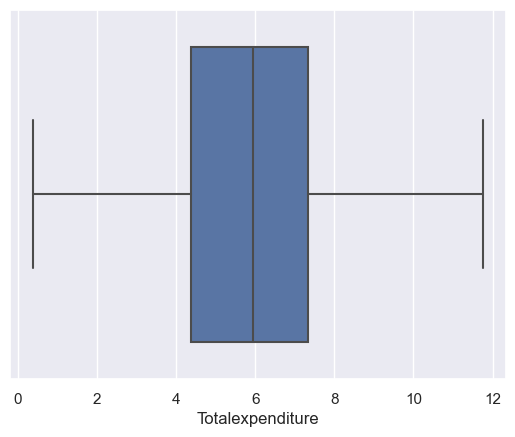

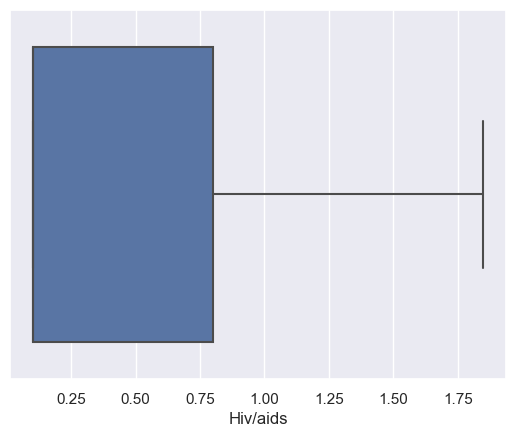

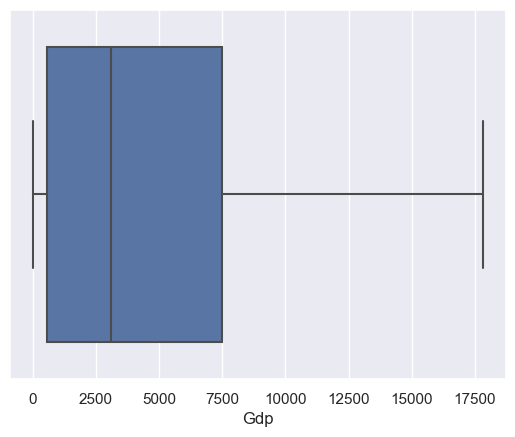

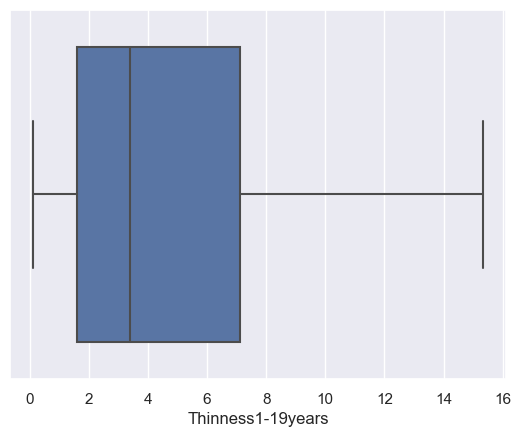

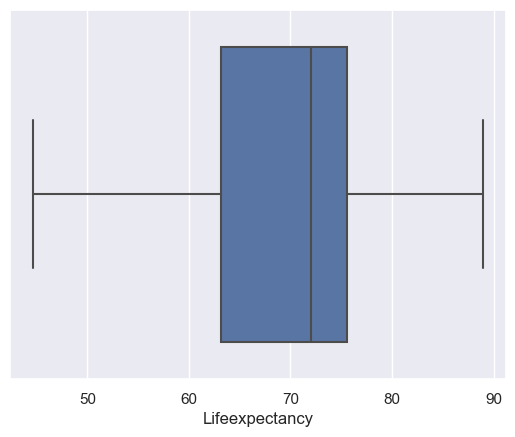

In [282]:
for i in data[['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years','Lifeexpectancy']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

# Multiple Liner Regression Model

In [283]:
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [284]:
x1=data[['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years']]

y=data['Lifeexpectancy']

In [285]:
x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

In [324]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Lifeexpectancy   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1215.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:54:42   Log-Likelihood:                -8368.8
No. Observations:                2938   AIC:                         1.676e+04
Df Residuals:                    2927   BIC:                         1.683e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    73.6230      0.401    183.806      0.000      72.838      74.408
Adultmortality           -0.0192      0.001    -22.133      0.000      -0.021      -0.017
Infantdeaths             -0.0658      0.006    -11.655      0.000      -0.077      -0.055
Alcohol                   0.2274      0.024      9.572      0.000       0.181       0.274
Percentageexpenditure     0.0022      0.000      7.300      0.000       0.002       0.003
Measles                  -0.0003      0.000     -1.107      0.268      -0.001       0.000
Bmi                       0.0234      0.005      4.554      0.000       0.013       0.033
Totalexpenditure          0.1110      0.036      3.065      0.002       0.040       0.182
Hiv/aids                 -6.5382      0.151    -43.330      0.000      -6.834      -6.242
Gdp                       0.0001   2.08e-05      6.346      0.000    9.14e-05       0.000
Thinness1-19years        -0.1497      0.026     -5.732      0.000      -0.201      -0.099
==============================================================================
Omnibus:                       70.038   Durbin-Watson:                   0.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.721
Skew:                          -0.127   Prob(JB):                     1.68e-31
Kurtosis:                       4.045   Cond. No.                     3.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [288]:
x=data [['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years']]
y=data['Lifeexpectancy']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [290]:
reg = LinearRegression()

In [291]:
reg.fit(X_train, y_train)

LinearRegression()

In [292]:
y_pred = reg.predict(X_test)

In [293]:
y_pred


array([71.37491442, 79.18907848, 75.74478403, 77.67923469, 49.0337887 ,
       50.36786504, 74.59400857, 70.22426132, 76.12617169, 56.32865356,
       50.21866941, 52.59727251, 59.25361412, 72.81264062, 69.66924606,
       58.21559999, 61.05557945, 79.97844845, 60.33908345, 79.48709877,
       80.40706949, 80.93866905, 72.23756925, 73.49849981, 71.09931534,
       59.89968322, 61.93033397, 66.71255998, 75.05054772, 74.05677074,
       66.73023415, 76.96530268, 73.87693342, 64.99481569, 80.80952353,
       57.70739627, 57.55538605, 72.49789945, 69.44227014, 75.58136311,
       53.51432306, 56.06879391, 77.17888176, 79.56406746, 75.15118908,
       59.40322203, 80.17364467, 71.01165218, 67.00296793, 65.39100088,
       58.51466121, 72.06210412, 77.15375112, 75.65384514, 73.39778884,
       53.85822336, 77.8223637 , 73.85656505, 71.37636737, 67.58156385,
       76.64010804, 53.39828121, 71.67284012, 68.32435745, 53.14301755,
       53.92935837, 53.34278152, 81.53309101, 58.12456403, 77.17

In [294]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred

X_test

,Adultmortality,Infantdeaths,Alcohol,Percentageexpenditure,Measles,Bmi,Totalexpenditure,Hiv/aids,Gdp,Thinness1-19years,actual,predicted
2546,123.0,8.0,0.970000,122.652333,517.000,48.5,3.78000,0.10,1762.246170,6.4,73.7,71.374914
650,113.0,0.0,11.830000,1096.807347,1.000,58.1,6.95000,0.10,11363.418450,1.8,75.9,79.189078
1740,125.0,0.0,4.980000,678.518894,0.000,57.2,6.74000,0.10,5957.145693,2.1,74.2,75.744784
177,7.0,0.0,1.570000,367.255674,46.000,62.9,4.98000,0.10,17837.165680,6.1,76.8,77.679235
1377,428.0,55.0,1.510000,0.681686,900.625,14.4,4.68000,1.85,43.979713,9.2,51.9,49.033789
...,...,...,...,...,...,...,...,...,...,...,...,...
859,336.0,7.0,0.970000,10.602698,128.000,14.3,3.30000,1.40,297.828588,9.3,59.7,57.151816
1405,91.0,0.0,0.020000,1096.807347,23.000,65.9,2.76000,0.10,17837.165680,3.2,73.5,77.459548
962,262.0,3.0,4.602861,0.000000,71.000,27.3,5.93819,1.70,7483.158469,7.3,61.1,59.541393
2658,188.0,0.0,6.350000,103.371069,0.000,38.4,4.49000,0.60,1495.963370,6.2,69.6,68.517010


In [295]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 3.0244611446679754
MSE is 15.89435023159835
RMSE is 3.9867719061414024
R2 score is 0.8162693530830407


# Decision Tree Regression

In [296]:
data

,Adultmortality,Infantdeaths,Alcohol,Percentageexpenditure,Measles,Bmi,Totalexpenditure,Hiv/aids,Gdp,Thinness1-19years,Lifeexpectancy
0,263.0,55.0,0.01,71.279624,900.625,19.1,8.16,0.10,584.259210,15.35,65.0
1,271.0,55.0,0.01,73.523582,492.000,18.6,8.18,0.10,612.696514,15.35,59.9
2,268.0,55.0,0.01,73.219243,430.000,18.1,8.13,0.10,631.744976,15.35,59.9
3,272.0,55.0,0.01,78.184215,900.625,17.6,8.52,0.10,669.959000,15.35,59.5
4,275.0,55.0,0.01,7.097109,900.625,17.2,7.87,0.10,63.537231,15.35,59.2
...,...,...,...,...,...,...,...,...,...,...,...
2933,456.5,27.0,4.36,0.000000,31.000,27.1,7.13,1.85,454.366654,9.40,44.6
2934,456.5,26.0,4.06,0.000000,900.625,26.7,6.52,1.85,453.351155,9.80,44.6
2935,73.0,25.0,4.43,0.000000,304.000,26.3,6.53,1.85,57.348340,1.20,44.8
2936,456.5,25.0,1.72,0.000000,529.000,25.9,6.16,1.85,548.587312,1.60,45.3


In [297]:
X= data [['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years']]

y=data['Lifeexpectancy']

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [299]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [300]:
def evaluate(model, X_test, y_test):
    
    y_pred_DT = reg.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred_DT)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred_DT)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [301]:
reg = DecisionTreeRegressor()

reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [302]:
result = evaluate(reg, X_test, y_test)

The model performance for testing set
--------------------------------------
RMSE is 3.1848666404349526
R2 score is 0.8905567168104495


# Random Forest Regression 

In [303]:
regRF = RandomForestRegressor(n_estimators = 100)

regRF.fit(X_train,y_train)

RandomForestRegressor()

In [304]:
def evaluate(model, X_test, y_test):
    
    y_pred_RF = regRF.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred_RF)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred_RF)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [305]:
result = evaluate(regRF, X_test, y_test)

The model performance for testing set
--------------------------------------
RMSE is 1.996178368183604
R2 score is 0.9570062527326914


# Support Vector Machines for Regression

In [306]:
data

,Adultmortality,Infantdeaths,Alcohol,Percentageexpenditure,Measles,Bmi,Totalexpenditure,Hiv/aids,Gdp,Thinness1-19years,Lifeexpectancy
0,263.0,55.0,0.01,71.279624,900.625,19.1,8.16,0.10,584.259210,15.35,65.0
1,271.0,55.0,0.01,73.523582,492.000,18.6,8.18,0.10,612.696514,15.35,59.9
2,268.0,55.0,0.01,73.219243,430.000,18.1,8.13,0.10,631.744976,15.35,59.9
3,272.0,55.0,0.01,78.184215,900.625,17.6,8.52,0.10,669.959000,15.35,59.5
4,275.0,55.0,0.01,7.097109,900.625,17.2,7.87,0.10,63.537231,15.35,59.2
...,...,...,...,...,...,...,...,...,...,...,...
2933,456.5,27.0,4.36,0.000000,31.000,27.1,7.13,1.85,454.366654,9.40,44.6
2934,456.5,26.0,4.06,0.000000,900.625,26.7,6.52,1.85,453.351155,9.80,44.6
2935,73.0,25.0,4.43,0.000000,304.000,26.3,6.53,1.85,57.348340,1.20,44.8
2936,456.5,25.0,1.72,0.000000,529.000,25.9,6.16,1.85,548.587312,1.60,45.3


In [307]:
targets = data['Lifeexpectancy']
inputs = data [['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years']]

In [308]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [309]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy is', r2*100, '%')
    
    return r2

### SVR by default

In [310]:
from sklearn.svm import SVR

base_model = SVR()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Accuracy is 39.46769127297496 %


In [311]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

epsilon = [0.1 , 0.01, 0.001, 0.0001]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0], 'epsilon': [0.1, 0.01, 0.001, 0.0001]}


In [312]:
svr_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)

svr_random.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'epsilon': [0.1, 0.01, 0.001, 0.0001],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=1)

In [313]:
svr_random.best_params_

{'kernel': 'poly', 'gamma': 'scale', 'epsilon': 0.0001, 'C': 10}

In [314]:
optimized_model = svr_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, x_test, y_test)

Model Performance
Accuracy is 19.60968226969554 %


# Catboost

In [315]:
data

,Adultmortality,Infantdeaths,Alcohol,Percentageexpenditure,Measles,Bmi,Totalexpenditure,Hiv/aids,Gdp,Thinness1-19years,Lifeexpectancy
0,263.0,55.0,0.01,71.279624,900.625,19.1,8.16,0.10,584.259210,15.35,65.0
1,271.0,55.0,0.01,73.523582,492.000,18.6,8.18,0.10,612.696514,15.35,59.9
2,268.0,55.0,0.01,73.219243,430.000,18.1,8.13,0.10,631.744976,15.35,59.9
3,272.0,55.0,0.01,78.184215,900.625,17.6,8.52,0.10,669.959000,15.35,59.5
4,275.0,55.0,0.01,7.097109,900.625,17.2,7.87,0.10,63.537231,15.35,59.2
...,...,...,...,...,...,...,...,...,...,...,...
2933,456.5,27.0,4.36,0.000000,31.000,27.1,7.13,1.85,454.366654,9.40,44.6
2934,456.5,26.0,4.06,0.000000,900.625,26.7,6.52,1.85,453.351155,9.80,44.6
2935,73.0,25.0,4.43,0.000000,304.000,26.3,6.53,1.85,57.348340,1.20,44.8
2936,456.5,25.0,1.72,0.000000,529.000,25.9,6.16,1.85,548.587312,1.60,45.3


In [316]:
output = data['Lifeexpectancy']
inputs = data [['Adultmortality', 
                  'Infantdeaths', 
                  'Alcohol',
                 'Percentageexpenditure',
                'Measles',
                  'Bmi',
                 'Totalexpenditure',
                   'Hiv/aids', 
                  'Gdp',
                  'Thinness1-19years']]

In [317]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [318]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [319]:
from catboost import CatBoostRegressor

In [320]:
catboost_model = CatBoostRegressor(iterations=100, 
                                   learning_rate=0.1, 
                                   depth=6,  
                                   loss_function='RMSE',  
                                   random_seed=42  
                                   )
catboost_model.fit(X_train, y_train, verbose=10)  

y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

0:	learn: 8.7117802	total: 6.31ms	remaining: 624ms
10:	learn: 4.6907289	total: 50.4ms	remaining: 407ms
20:	learn: 3.2656018	total: 93.9ms	remaining: 353ms
30:	learn: 2.7794723	total: 139ms	remaining: 309ms
40:	learn: 2.5477732	total: 181ms	remaining: 261ms
50:	learn: 2.4291873	total: 222ms	remaining: 214ms
60:	learn: 2.3105455	total: 276ms	remaining: 177ms
70:	learn: 2.2357292	total: 330ms	remaining: 135ms
80:	learn: 2.1671396	total: 376ms	remaining: 88.1ms
90:	learn: 2.0855133	total: 422ms	remaining: 41.7ms
99:	learn: 2.0266865	total: 461ms	remaining: 0us
Mean Squared Error: 4.951845190384272


# XGB model

In [322]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [323]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgboost_model = xgb.XGBRegressor(n_estimators=100,  
                                 learning_rate=0.1, 
                                 max_depth=6,  
                                 objective='reg:squarederror',  
                                 random_state=42  
                                 )


xgboost_model.fit(X_train, y_train, verbose=10)  

y_pred = xgboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.849784433265579
